**Name** : Mohammad Furquan Shaikh

**Roll No** : B1951038

**PRN** : 72018287F

**Class** : BE IT A

# Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
%matplotlib inline

# Loading and preparing the data

In [2]:
#import dataset and split into train and test 
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

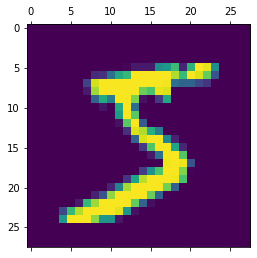

In [3]:
#to see how first image looks
plt.matshow(x_train[0])

In [4]:
#normalising the images by scaling the pixel intensities to the range 0 to 1
x_train = x_train / 255
x_test = x_test / 255

# Creating the Model

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Compile the model

In [7]:
model.compile(optimizer = 'sgd',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train the Model

In [8]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6384 - accuracy: 0.8414 - val_loss: 0.3529 - val_accuracy: 0.9052
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3326 - accuracy: 0.9073 - val_loss: 0.2894 - val_accuracy: 0.9203
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2844 - accuracy: 0.9203 - val_loss: 0.2567 - val_accuracy: 0.9281
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2539 - accuracy: 0.9288 - val_loss: 0.2368 - val_accuracy: 0.9339
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2312 - accuracy: 0.9346 - val_loss: 0.2176 - val_accuracy: 0.9381
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2132 - accuracy: 0.9403 - val_loss: 0.2025 - val_accuracy: 0.9408
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1978 - accuracy: 0.9445 - val_loss: 0.1878 - val_accuracy:

# Evaluate the Model

In [9]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss = %.3f" %test_loss)
print("Accuracy = %.3f" %test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1600 - accuracy: 0.9521
Loss = 0.160
Accuracy = 0.952


# Making Prediction on New Data

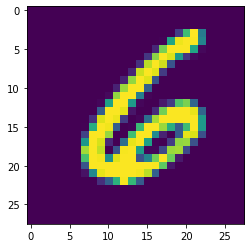

In [10]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

# Confusion Matrix

In [11]:
test_predict = model.predict(x_test)
#get classification labels
test_predict_labels = np.argmax(test_predict,axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = test_predict_labels)
print('Confusion Matrix of the Test Set :\n' , confusion_matrix)

313/313 [==============================] - 1s 3ms/step
Confusion Matrix of the Test Set :
 tf.Tensor(
[[ 967    0    1    1    0    4    4    2    1    0]
 [   0 1117    2    2    0    1    4    2    7    0]
 [   7    1  978    7    6    2    9    9    9    4]
 [   1    1   10  954    1   13    1   11   11    7]
 [   1    1    3    1  924    0   14    2    2   34]
 [   8    1    1   21    3  829   12    1   11    5]
 [  12    3    2    0   10    8  919    2    2    0]
 [   0    7   18    4    3    1    0  976    1   18]
 [   5    4    3   12    6    6   10    8  916    4]
 [   9    6    1    8   21    3    1   13    6  941]], shape=(10, 10), dtype=int32)
